
# Linear Regression in Theano

https://www.youtube.com/watch?v=S75EdAcXHKk

In [70]:
from __future__ import division

%matplotlib inline

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

import mpld3
mpld3.enable_notebook()

In [71]:
import theano
from theano import tensor

## Load MNIST Data

In [72]:
from os import path
data_path = '/home/andershuss/data/theano_data/mnist/train/'
features = np.load(path.join(data_path, 'features.npy'))
targets = np.load(path.join(data_path, 'targets.npy'))

In [73]:
features.shape

(1000, 1, 28, 28)

In [74]:
targets.shape

(1000, 1)

In [75]:
n_samples = targets.shape[0]
n_classes = len(np.unique(targets))
n_features = 28 * 28

### Flatten and normalize X

In [76]:
training_X = features.reshape(n_samples, -1) / 255.0  # normalize!

### One-hot-encode y

In [77]:
targets[:5]

array([[5],
       [0],
       [4],
       [1],
       [9]], dtype=uint8)

In [78]:
training_y = targets.flatten()
training_y_one_hot = np.zeros((targets.shape[0], 10))
training_y_one_hot[np.arange(n_samples), targets.flatten()] = 1.0
training_y_one_hot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [79]:
def floatX(x):
    return np.asarray(x, dtype=theano.config.floatX)

In [80]:
def init_param(shape):
    std = 0.01
    param = theano.shared(
        floatX(
            np.random.randn(*shape) * std
        )
    )
    return param

In [81]:
def model(X, W):
    y_prob_hat = tensor.nnet.softmax(
        tensor.dot(X, W)
    )
    return y_prob_hat

In [82]:
X = tensor.fmatrix('X')
y_one_hot = tensor.fmatrix('y')

In [83]:
W = init_param(
    shape=(
        training_X.shape[1],
        10
    )
)  # shape = (28 x 28, 10) = (n_features, n_classes) 

In [84]:
y_prob_hat = model(X, W)
y_hat = tensor.argmax(y_prob_hat, axis=1)

In [85]:
cost = tensor.mean(
    tensor.nnet.categorical_crossentropy(
        y_prob_hat,
        y_one_hot
    )
)

In [86]:
gradient = tensor.grad(cost, wrt=W)

In [87]:
learning_rate = 0.05
updates = [[W, W - gradient * learning_rate]]

In [88]:
train_one_batch = theano.function(
    inputs=[X, y_one_hot],
    outputs=cost,
    updates=updates,
    allow_input_downcast=True
)

In [89]:
def train_one_epoch(batch_size=100):
    cost_acc = 0.0
    n_processed_batches = 0
    for start, end in zip(
        range(0, n_samples, batch_size),
        range(batch_size, n_samples, batch_size)
    ):
        batch_cost = train_one_batch(
            training_X[start:end, :],
            training_y_one_hot[start:end, :]
        )
        cost_acc += batch_cost
        n_processed_batches += 1
    
    epoch_mean_cost = cost_acc / n_processed_batches
    
    return epoch_mean_cost
    

In [90]:
n_epochs = 100
epoch_costs = []
for i in range(n_epochs):
    epoch_cost = train_one_epoch()
    epoch_costs.append(
        epoch_cost
    )
    print(epoch_cost)

2.11171464125
1.72634406885
1.4576073885
1.26831691795
1.13120970461
1.02849098709
0.949011862278
0.885737929079
0.834119538466
0.791125708156
0.754677315553
0.723308609592
0.695960124334
0.671848813693
0.650384207567
0.631112833818
0.613680965371
0.597808324628
0.58327032129
0.569884383016
0.557500849168
0.545995626185
0.535264972183
0.525221480264
0.515790869792
0.506909585661
0.498522980346
0.490583674775
0.483050541745
0.475887454218
0.469062685966
0.462548275789
0.456319401662
0.450353903903
0.444631993771
0.43913607796
0.433850096332
0.428759713968
0.423851887385
0.419114851289
0.414537767569
0.410110937224
0.40582532684
0.401672734155
0.397645582755
0.393736965126
0.389940427409
0.386250095235
0.382660481665
0.379166526927
0.375763492452
0.372446967496
0.369212965171
0.366057541635
0.362977254722
0.359968715244
0.357028858529
0.35415470269
0.351343547304
0.34859277308
0.34589995775
0.343262881041
0.340679294533
0.338147229618
0.335664732589
0.333229990469
0.330841297905
0.328496

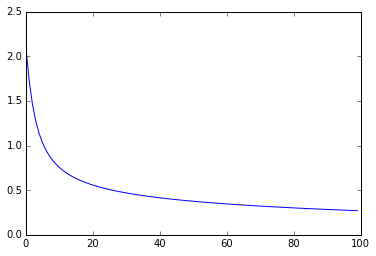

In [91]:
plt.plot(epoch_costs)

In [92]:
y_hat_evaluate = theano.function(inputs=[X], outputs=y_hat, allow_input_downcast=True)

In [93]:
y_pred = y_hat_evaluate(training_X)

In [94]:
missclass = (training_y != y_pred).sum() / n_samples

In [95]:
missclass

0.056000000000000001